# Exocomet free spectrum

In [1]:
import numpy as np
import json, sys, os

import matplotlib.pyplot as plt
from matplotlib import rc, cm

# get the path of the current directory
path = os.getcwd()
home = os.path.dirname(path)

# Print the repository home directory
print("Repository home directory:",home)

# Add the src folder to the system path
sys.path.append(home+'/src')

# Import the python functions from src/calculations.py
from calculations import Calc

# We shorten the function name to make it easier to call the required a functions
c   = Calc()

Repository home directory: /home/pas/science/exocomets


In [2]:
# Importing parameters from a json file.
with open(home+'/params.json') as param_file:    
   param = json.load(param_file)

In [3]:
# We read in the data directories we are using. To see what directories this is open params.json.
datadirs = param["datadirs"]

# We select part A which is the red end of the spectrum (the other part being B, which is the blue end)
part     = param["BetaPictoris"]["part"]

In [4]:
D = []

print("Data used for this analysis:")

for i in sorted(datadirs):
    print("\n",datadirs[i])
    D.append(c.GetData(param, home+'/'+datadirs[i]))
    
# We save the data
np.savez(home+'/data/D_'+part+'.npz', D, dtype=object)

Data used for this analysis:

 data/2014-02-14/
	AVM shift: 0.0" 	EXP: 2469s, 	Date: 2014-02-22, Time: 07:43:47 UTC

 data/2015-12-10/
	AVM shift: 0.0" 	EXP: 2220s, 	Date: 2015-12-10, Time: 10:08:24 UTC
	AVM shift: -0.8" 	EXP: 504s, 	Date: 2015-12-10, Time: 11:36:28 UTC
	AVM shift: 0.8" 	EXP: 504s, 	Date: 2015-12-10, Time: 11:54:55 UTC

 data/2015-12-26/
	AVM shift: 0.0" 	EXP: 392s, 	Date: 2015-12-26, Time: 00:07:51 UTC
	AVM shift: -0.8" 	EXP: 392s, 	Date: 2015-12-26, Time: 00:23:46 UTC
	AVM shift: 0.8" 	EXP: 392s, 	Date: 2015-12-26, Time: 00:39:41 UTC
	AVM shift: 1.1" 	EXP: 218s, 	Date: 2015-12-26, Time: 01:36:06 UTC

 data/2016-01-30/
	AVM shift: 0.0" 	EXP: 392s, 	Date: 2016-01-30, Time: 05:54:51 UTC
	AVM shift: -0.8" 	EXP: 392s, 	Date: 2016-01-30, Time: 06:10:46 UTC
	AVM shift: 0.8" 	EXP: 392s, 	Date: 2016-01-30, Time: 06:26:41 UTC
	AVM shift: 1.1" 	EXP: 218s, 	Date: 2016-01-30, Time: 07:22:55 UTC

 data/2017-04-23/
	AVM shift: 0.0" 	EXP: 2104s, 	Date: 2017-04-22, Time: 23:36:06 UTC

/usr/lib/python3.10/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


In [5]:
# Load the data into the multidimentional array D
D = c.LoadData(home+'/data/D_'+part+'.npz')

# Normalise the data
Dn = c.NormSpec(param, D)

# Shift the data relative to the first spectrum of each visit
Dns = c.ShiftSpec(param, Dn)

# Re normalise the data
Dnsn = c.NormSpec(param, Dns)

# We save the normalised and shifted data
np.savez(home+'/data/Dnsn_'+part+'.npz', Dns, dtype=object)



Normalising the spectra relative to first spectrum...
Done



Shifting the 1st observation:


Observations done at: 2014-02-22 07:43:47
______________________________________________

 Pixel shift [pix]:	 0
 W shift [A]:		 0.0
 RV shift [km/s]:	 0
______________________________________________



Shifting the 2nd observation:


Observations done at: 2015-12-10 10:08:24
______________________________________________

 Pixel shift [pix]:	 1
 W shift [A]:		 0.01
 RV shift [km/s]:	 2
______________________________________________


Observations done at: 2015-12-10 11:36:28
______________________________________________

 Pixel shift [pix]:	 35
 W shift [A]:		 0.35
 RV shift [km/s]:	 84
______________________________________________


Observations done at: 2015-12-10 11:54:55
______________________________________________

 Pixel shift [pix]:	 -35
 W shift [A]:		 -0.35
 RV shift [km/s]:	 -84
______________________________________________



Shifting the 3th observation:


Observations don

/home/pas/science/exocomets/src/calculations.py:288: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(Dn)
/home/pas/science/exocomets/src/calculations.py:243: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(Ds)


In [6]:
# The structure here is
# DP[visit][orbit][0 = wavelength, 1 = flux, 2 = one sigma uncertainty, 3 = datetime]
DP   = c.LoadData(home+'/data/Dnsn_'+part+'.npz')

In [7]:
import numpy as np

spec        = []
spec_err    = []

for i in range(len(DP)):          # Cycle over number of visits
    for j in range(len(DP[i])):   # Cycle over number of fits files each visit
        spec.append(DP[i][j][1])
        spec_err.append(DP[i][j][2])

spec        = np.array(spec)
spec_err    = np.array(spec_err)

print("Combining",str(len(spec))," spectra")

spec        = c.ReplaceWithSmallNumber(spec)
spec_err    = c.ReplaceWithOne(spec_err)

weights     = 1./(spec_err**2)
weights     = weights/np.sum(weights)   # Technically not needed as np.average does this

spec_w_ave  = np.average(spec, axis=0, weights=weights)
errorbars_2 = np.sum((weights*spec_err)**2, axis=0)

Combining 35  spectra


In [8]:
spec_max = np.max(spec, axis=0)
threshold = np.percentile(spec, 90, axis=0)#np.max(spec, axis=0)
spec_std = np.std(spec, axis=0)
spec_err_std = np.average(spec_err, axis=0)

In [9]:
w = DP[0][0][0]
s1, s2 = c.RegionSelect(w, 1396, 1401)
ave_uncertainty = np.average(spec_std[s1:s2])
print("The average uncertainty is:",ave_uncertainty)
spec_exocomet_free = threshold-ave_uncertainty

The average uncertainty is: 2.414420139240851e-14


In [10]:
# Setting the parameters for the plots
plotting_params = {'backend': 'wxAgg',
                   'font.family': 'serif',
                   'font.size': 22,
                   'lines.markersize' : 2,
                   'axes.labelsize': 22,
                   'legend.fontsize': 22,
                   'xtick.labelsize': 22,
                   'ytick.labelsize': 22,
                   'text.usetex': True}

plt.rcParams.update(plotting_params)

(0.0, 8e-14)

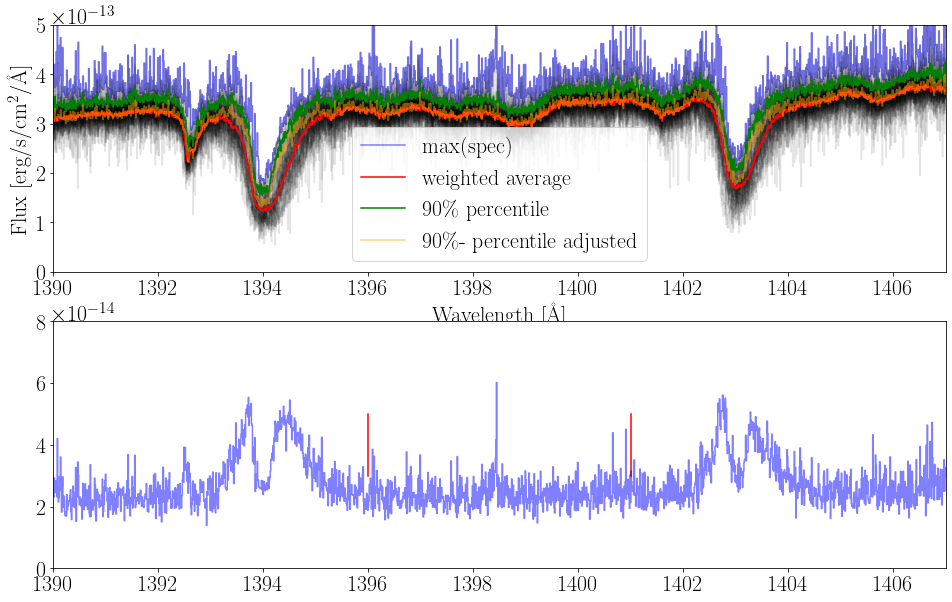

In [11]:
#%matplotlib widget
fig = plt.figure(figsize=(16.0,10.0))

ax1 = plt.subplot(211)
plt.step(DP[0][0][0],spec_max,c="blue",alpha=0.5,label="max(spec)")

for i in range(len(DP)):
    for j in range(len(DP[i])):
        plt.step(DP[i][j][0],DP[i][j][1],c="black",alpha=0.1)
plt.step(DP[0][0][0],spec_w_ave,c="red",label="weighted average")
plt.step(DP[0][0][0],threshold,c="green",label="90\% percentile")
plt.step(DP[0][0][0],spec_exocomet_free,c="orange",alpha=0.5,label="90\%- percentile adjusted")

plt.legend(loc='lower center', numpoints=1)
plt.xlim(1390,1407)
plt.ylim(0,5e-13)

plt.xlabel(r'Wavelength [\AA]')
plt.ylabel(r'Flux [erg/s/cm$^2$/\AA]')

ax1 = plt.subplot(212)
plt.plot([w[s1],w[s1]],[3e-14,5e-14],color="red")
plt.plot([w[s2],w[s2]],[3e-14,5e-14],color="red")
plt.step(DP[0][0][0],spec_std,c="blue",alpha=0.5,label="max(spec)")
plt.xlim(1390,1407)
plt.ylim(0,0.8e-13)

Text(0.5, 0, 'Wavelength [\\AA]')

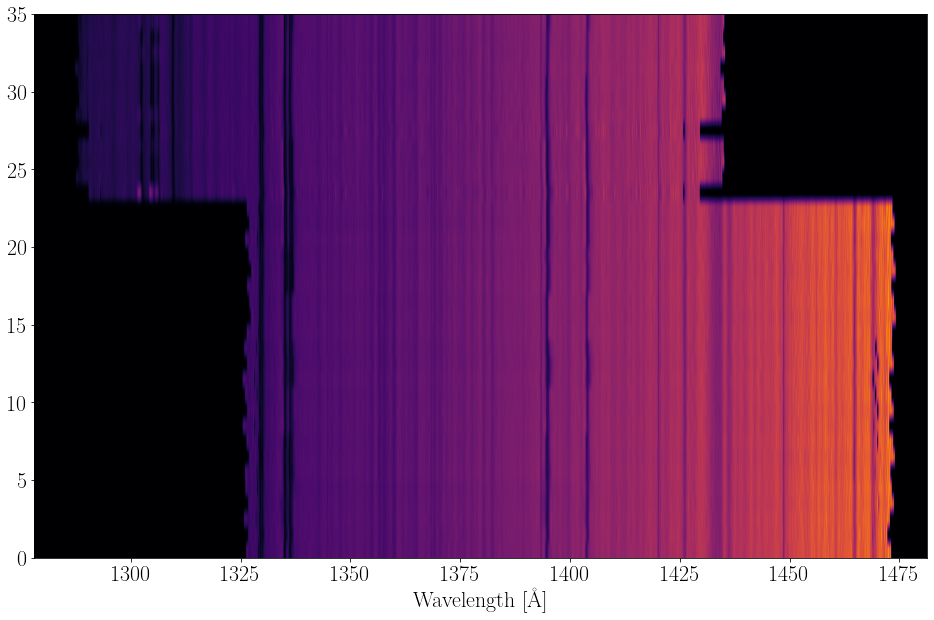

In [47]:
spec_range   = len(w)
rows         = len(spec)

S            = spec.reshape(rows,spec_range)
cmap = plt.get_cmap('inferno')

fig = plt.figure(figsize=(16.0,10.0))
plt.imshow(S,cmap=cmap,extent=[w[0],w[-1],0,len(S)],aspect='auto')
plt.xlabel(r'Wavelength [\AA]')
#plt.xlim(1392, 1407)

In [150]:
y_ticks = []
y_labels = []
counter = 50
spec_exocomet = []
for i in range(len(DP)):
    for j in range(len(DP[i])):
        print("█▓▒▒░░░ Visit:",i+1,"-","orbit:",str(j+1)+"/"+str(len(DP[i])),"░░░▒▒▓█")
        spec_exocomet.append(DP[i][j][1]-spec_exocomet_free)
        
        if j == len(DP[i])-1:
            #if len(DP[i]) == 1 and i == 0:
            #    counter = counter - len(DP[i])-1.5
            #elif i in [2,3]:
            #    print("here")
            #    counter = counter - len(DP[i])
            #else:
            #    counter = counter - len(DP[i])-1.0
            counter = counter - len(DP[i])-1.0
            y_labels.append(DP[i][j][3].strftime("%d %b %Y"))
            y_ticks.append(counter)
            spec_exocomet.append(np.ones(spec_range)*-1)
            print("")

spec_exocomet = np.array(spec_exocomet)

█▓▒▒░░░ Visit: 1 - orbit: 1/1 ░░░▒▒▓█

█▓▒▒░░░ Visit: 2 - orbit: 1/3 ░░░▒▒▓█
█▓▒▒░░░ Visit: 2 - orbit: 2/3 ░░░▒▒▓█
█▓▒▒░░░ Visit: 2 - orbit: 3/3 ░░░▒▒▓█

█▓▒▒░░░ Visit: 3 - orbit: 1/4 ░░░▒▒▓█
█▓▒▒░░░ Visit: 3 - orbit: 2/4 ░░░▒▒▓█
█▓▒▒░░░ Visit: 3 - orbit: 3/4 ░░░▒▒▓█
█▓▒▒░░░ Visit: 3 - orbit: 4/4 ░░░▒▒▓█

█▓▒▒░░░ Visit: 4 - orbit: 1/4 ░░░▒▒▓█
█▓▒▒░░░ Visit: 4 - orbit: 2/4 ░░░▒▒▓█
█▓▒▒░░░ Visit: 4 - orbit: 3/4 ░░░▒▒▓█
█▓▒▒░░░ Visit: 4 - orbit: 4/4 ░░░▒▒▓█

█▓▒▒░░░ Visit: 5 - orbit: 1/3 ░░░▒▒▓█
█▓▒▒░░░ Visit: 5 - orbit: 2/3 ░░░▒▒▓█
█▓▒▒░░░ Visit: 5 - orbit: 3/3 ░░░▒▒▓█

█▓▒▒░░░ Visit: 6 - orbit: 1/3 ░░░▒▒▓█
█▓▒▒░░░ Visit: 6 - orbit: 2/3 ░░░▒▒▓█
█▓▒▒░░░ Visit: 6 - orbit: 3/3 ░░░▒▒▓█

█▓▒▒░░░ Visit: 7 - orbit: 1/3 ░░░▒▒▓█
█▓▒▒░░░ Visit: 7 - orbit: 2/3 ░░░▒▒▓█
█▓▒▒░░░ Visit: 7 - orbit: 3/3 ░░░▒▒▓█

█▓▒▒░░░ Visit: 8 - orbit: 1/3 ░░░▒▒▓█
█▓▒▒░░░ Visit: 8 - orbit: 2/3 ░░░▒▒▓█
█▓▒▒░░░ Visit: 8 - orbit: 3/3 ░░░▒▒▓█

█▓▒▒░░░ Visit: 9 - orbit: 1/3 ░░░▒▒▓█
█▓▒▒░░░ Visit: 9 - orbit: 2/3 ░░░▒▒▓█
█▓▒▒

-1.0


[Text(0, 48.0, '22 Feb 2014'),
 Text(0, 44.0, '10 Dec 2015'),
 Text(0, 39.0, '26 Dec 2015'),
 Text(0, 34.0, '30 Jan 2016'),
 Text(0, 30.0, '23 Apr 2017'),
 Text(0, 26.0, '10 Jun 2017'),
 Text(0, 22.0, '04 Aug 2017'),
 Text(0, 18.0, '20 Oct 2017'),
 Text(0, 14.0, '26 Nov 2017'),
 Text(0, 10.0, '17 Mar 2018'),
 Text(0, 6.0, '09 May 2018'),
 Text(0, 4.0, '29 Oct 2018'),
 Text(0, 2.0, '15 Dec 2018')]

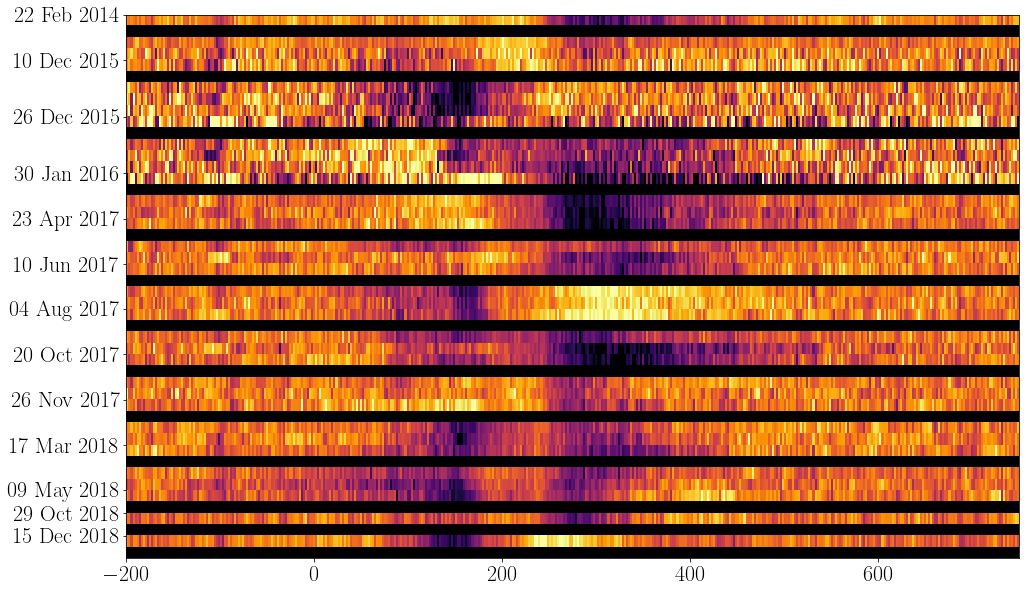

In [151]:
#black_line = np.zeros(spec_range)

print(spec_exocomet.min())

rows         = len(spec_exocomet)
EXO          = spec_exocomet.reshape(rows,spec_range)

rv = c.Wave2RV(w,1393.7550,20.5)

fig = plt.figure(figsize=(16.0,10.0))
plt.imshow(EXO,cmap=cmap,extent=[rv[0],rv[-1],0,len(EXO)],interpolation='none',vmin=-1.2e-13,vmax=5e-14,aspect='auto')
#plt.xlim(1392, 1407)
plt.xlim(-200, 750)
plt.gca().set_yticks(y_ticks) 
plt.gca().set_yticklabels(y_labels)